# MuMoT Test Suite

In [1]:
import MuMoT.MuMoT as mmt # if working directly from git clone
#import MuMoT as mmt # if working with pip installed module

Created `%%model` as an alias for `%%latex`.


## Substitution and display tests based on 2-d stop-signal model

**TODO** LaTeX rates *and* reactants to be used to test rendering functionality in plots and widgets

In [2]:
%%model
$
U -> A : g_1
U -> B : g_2
A -> U : a_1
B -> U : a_2
A + U -> A + A : r_1
B + U -> B + B : r_2
A + B -> A + U : s
A + B -> B + U : s
$

<IPython.core.display.Latex object>

In [3]:
model1 = mmt.parseModel(In[2])

In [ ]:
evol1 = model1.numSimStateVar(['A', 'B', 'U'], initCondsSV = {'A': 0.2, 'B': 0.3, 'U': 0.5}, tend=50, tstep=0.05, 
                              legend_loc='center right', plotProportion=False)

In [ ]:
evol1.showLogs()

In [4]:
model2 = model1.substitute('a_1 = 1/v_1, a_2 = 1/v_2, g_1 = v_1, g_2 = v_2, r_1 = v_1, r_2 = v_2')

In [5]:
model3 = model2.substitute('v_1 = \\mu + \\Delta/2, v_2 = \\mu - \\Delta/2')

In [ ]:
model3.showODEs()

In [ ]:
model3.show()

In [ ]:
model3.visualise()

### Check substitutions do not change original model

In [ ]:
model1.showODEs()

In [ ]:
model1.show()

In [ ]:
model1.visualise()

## Set system size

In [6]:
model4 = model3.substitute('U = N - \A - \B')

In [ ]:
model4.showODEs()

In [ ]:
evol2 = model4.numSimStateVar(['A', 'B'], initCondsSV = {'A': 0.2, 'B': 0.3}, tend=50, tstep=0.05, 
                              legend_loc='center right')

## 2d bifurcation plot tests

In [ ]:
#modelBifCont1 = model4.bifurcation('s','B', initSV=[['A', 0.1], ['B', 0.9]], 
#                                   fontsize=35, BifParInit =5, ContMaxNumPoints=450)

In [ ]:
modelBifCont1 = model4.bifurcation('s','A-B',initSV=[['A', 0.5], ['B', 0.5]])

In [ ]:
modelBifCont1.showLogs()

In [ ]:
model5 = model2.substitute('v_1 = v, v_2 = v')

In [ ]:
model6 = model5.substitute('U = N - \A - \B')

In [ ]:
model6.showODEs()

In [ ]:
#modelBifCont2 = model6.bifurcation('s','A',plottingMethod='mumot')

In [ ]:
#modelBifCont2.showLogs()

## 2d stream plot tests

In [ ]:
modelStreamCont1 = model4.stream('A', 'B',fontsize=25, xlab=r'this is the x-label', 
                                 showFixedPoints=True, showNoise=True)

In [ ]:
modelStreamCont1.showLogs(tail=True)

In [ ]:
modelStreamCont2 = model6.stream('A', 'B', showNoise=True, showFixedPoints=False)

In [ ]:
modelStreamCont2.showLogs()

## 2d vector plot tests

In [ ]:
modelVectorCont1 = model4.vector('A', 'B', showFixedPoints=True)

In [ ]:
modelVectorCont1.showLogs(tail=True)

## SSA and multiagent tests

In [ ]:
model4.SSA()

In [ ]:
ssa = model4.SSA(initWidgets={'realtimePlot':True, 
                        'initialState':{'U': [1,0,1,0.01],'B': [0,0,1,0.1],'A': [0,0,1,0.1]},
                        'runs':[3,1,20,1]})

FloatSlider(value=2.0, continuous_update=False, description='\\(\\Delta\\)', max=20.0, readout_format='.1f')

FloatSlider(value=2.0, continuous_update=False, description='\\(\\mu\\)', max=20.0, readout_format='.1f')

FloatSlider(value=2.0, continuous_update=False, description='\\(s\\)', max=20.0, readout_format='.1f')

IntSlider(value=10, continuous_update=False, description='System size', min=5)

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

Accordion(children=(Box(children=(FloatSlider(value=1.0, continuous_update=False, description='Reactant \\(A\\)', disabled=True, max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='Reactant \\(B\\)', max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='Reactant \\(U\\)', max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=3.0, continuous_update=False, description='Simulation time:', max=10.0, readout_format='.1f', style=SliderStyle(description_width='initial')), FloatSlider(value=1.0, continuous_update=False, description='Timestep size', layout=Layout(width='50%'), max=1.0, min=0.01, step=0.01, style=SliderStyle(description_width='initial')), Dropdown(description='Network topology:', options=(('Full graph', <NetworkType.FULLY_CONNECTED: 0>), ('Erdos-Renyi', <NetworkType.ERSOS_RENYI: 1>), ('Barabasi-Albert', <NetworkType.BARABASI_ALBERT: 2>), ('Moving particles', <NetworkType.DYNAMIC: 4>)), style=DescriptionStyle(description_width='initial'), value=<NetworkType.FULLY_CONNECTED: 0>), FloatSlider(value=0.0, continuous_update=False, description='Network connectivity parameter', layout=Layout(width='50%'), max=0.0, readout_format='.0f', step=0.0, style=SliderStyle(description_width='initial')), FloatSlider(value=0.01, continuous_update=False, description='Particle speed', layout=Layout(width='50%'), max=0.1, readout_format='.3f', step=0.005, style=SliderStyle(description_width='initial')), FloatSlider(value=0.5, continuous_update=False, description='Correlatedness of the random walk', layout=Layout(width='50%'), max=1.0, step=0.05, style=SliderStyle(description_width='initial')), IntText(value=201019313, description='Random seed:', style=DescriptionStyle(description_width='initial')), ToggleButtons(description='Plot:', options=(('Temporal evolution', 'evo'), ('Network', 'graph'), ('Final distribution', 'final'), ('Barplot', 'barplot')), tooltips=['Population change over time', 'Population distribution in each state at final timestep', 'Barplot of states at final timestep'], value='evo'), Dropdown(description='Final distribution (x axis):', layout=Layout(display='none'), options=(('A', 'A'), ('B', 'B'), ('U', 'U')), style=DescriptionStyle(description_width='initial'), value='A'), Dropdown(description='Final distribution (y axis):', index=1, layout=Layout(display='none'), options=(('A', 'A'), ('B', 'B'), ('U', 'U')), style=DescriptionStyle(description_width='initial'), value='B'), Checkbox(value=False, description='Show particle trace'), Checkbox(value=False, description='Show communication links'), Checkbox(value=False, description='Plot population proportions'), Checkbox(value=False, description='Runtime plot update'), IntSlider(value=1, continuous_update=False, description='Number of runs:', max=20, min=1, readout_format='.0f', style=SliderStyle(description_width='initial')), Checkbox(value=True, description='Aggregate results')), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

FloatProgress(value=0.0, bar_style='success', description='Loading:', max=1.0, style=ProgressStyle(description_width='initial'))

<IPython.core.display.Javascript object>


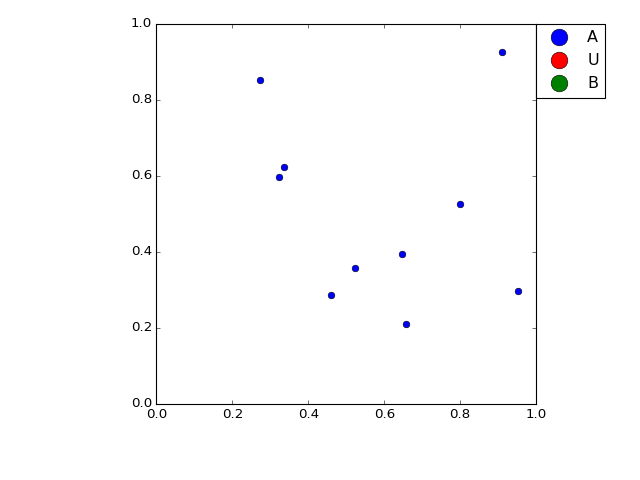

In [11]:
ma = model4.multiagent()

FloatSlider(value=2.0, continuous_update=False, description='\\(\\Delta\\)', max=20.0, readout_format='.1f')

FloatSlider(value=2.0, continuous_update=False, description='\\(\\mu\\)', max=20.0, readout_format='.1f')

FloatSlider(value=2.0, continuous_update=False, description='\\(s\\)', max=20.0, readout_format='.1f')

IntSlider(value=50, continuous_update=False, description='System size', min=3)

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

Accordion(children=(Box(children=(FloatSlider(value=0.0, continuous_update=False, description='Reactant \\(A\\)', disabled=True, max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='Reactant \\(B\\)', max=0.0, readout_format='.1f', style=SliderStyle(description_width='initial')), FloatSlider(value=1.0, continuous_update=False, description='Reactant \\(U\\)', max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=3.0, continuous_update=False, description='Simulation time:', max=10.0, readout_format='.1f', style=SliderStyle(description_width='initial')), FloatSlider(value=1.0, continuous_update=False, description='Timestep size', layout=Layout(width='50%'), max=1.0, min=0.01, step=0.01, style=SliderStyle(description_width='initial')), Dropdown(description='Network topology:', index=3, options=(('Full graph', <NetworkType.FULLY_CONNECTED: 0>), ('Erdos-Renyi', <NetworkType.ERSOS_RENYI: 1>), ('Barabasi-Albert', <NetworkType.BARABASI_ALBERT: 2>), ('Moving particles', <NetworkType.DYNAMIC: 4>)), style=DescriptionStyle(description_width='initial'), value=<NetworkType.DYNAMIC: 4>), FloatSlider(value=0.1, continuous_update=False, description='Network connectivity parameter', layout=Layout(width='50%'), max=1.0, step=0.05, style=SliderStyle(description_width='initial')), FloatSlider(value=0.01, continuous_update=False, description='Particle speed', layout=Layout(width='50%'), max=0.1, readout_format='.3f', step=0.005, style=SliderStyle(description_width='initial')), FloatSlider(value=0.5, continuous_update=False, description='Correlatedness of the random walk', layout=Layout(width='50%'), max=1.0, step=0.05, style=SliderStyle(description_width='initial')), IntText(value=94380711, description='Random seed:', style=DescriptionStyle(description_width='initial')), ToggleButtons(description='Plot:', index=1, options=(('Temporal evolution', 'evo'), ('Network', 'graph'), ('Final distribution', 'final'), ('Barplot', 'barplot')), tooltips=['Population change over time', 'Population distribution in each state at final timestep', 'Barplot of states at final timestep'], value='graph'), Dropdown(description='Final distribution (x axis):', layout=Layout(display='none'), options=(('A', 'A'), ('B', 'B'), ('U', 'U')), style=DescriptionStyle(description_width='initial'), value='A'), Dropdown(description='Final distribution (y axis):', index=1, layout=Layout(display='none'), options=(('A', 'A'), ('B', 'B'), ('U', 'U')), style=DescriptionStyle(description_width='initial'), value='B'), Checkbox(value=True, description='Show particle trace'), Checkbox(value=True, description='Show communication links'), Checkbox(value=False, description='Plot population proportions'), Checkbox(value=True, description='Runtime plot update'), IntSlider(value=1, continuous_update=False, description='Number of runs:', max=20, min=1, readout_format='.0f', style=SliderStyle(description_width='initial')), Checkbox(value=True, description='Aggregate results')), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

FloatProgress(value=0.0, bar_style='success', description='Loading:', max=1.0, style=ProgressStyle(description_width='initial'))

<IPython.core.display.Javascript object>


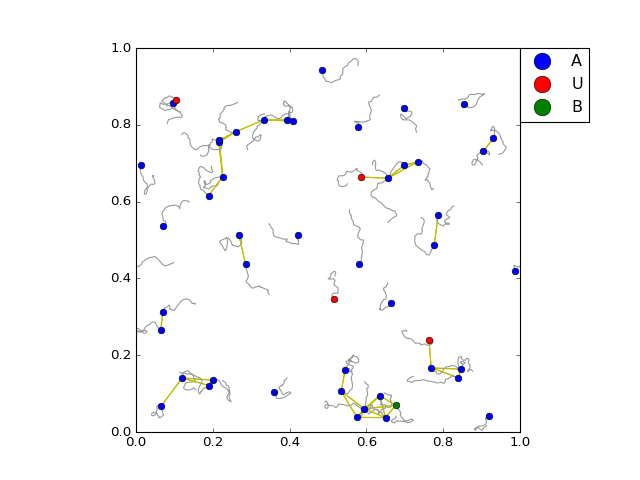

In [12]:
model4.multiagent(initWidgets={'realtimePlot':True, 'systemSize':[50,3,100,1],
                        'initialState':{'U': [1,0,1,0.01],'B': [0,0,1,0.1],'A': [0,0,1,0.1]},
                        'netType':'dynamic', 'visualisationType':'graph', 'showTrace':True, 'showInteractions':True})

FloatSlider(value=2.0, continuous_update=False, description='\\(\\Delta\\)', max=20.0, readout_format='.1f')

FloatSlider(value=2.0, continuous_update=False, description='\\(\\mu\\)', max=20.0, readout_format='.1f')

FloatSlider(value=2.0, continuous_update=False, description='\\(s\\)', max=20.0, readout_format='.1f')

IntSlider(value=15, continuous_update=False, description='System size', max=50, min=3)

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

Accordion(children=(Box(children=(FloatSlider(value=0.0, continuous_update=False, description='Reactant \\(A\\)', disabled=True, max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='Reactant \\(B\\)', max=0.0, readout_format='.1f', style=SliderStyle(description_width='initial')), FloatSlider(value=1.0, continuous_update=False, description='Reactant \\(U\\)', max=1.0, step=0.01, style=SliderStyle(description_width='initial')), FloatSlider(value=3.0, continuous_update=False, description='Simulation time:', max=10.0, readout_format='.1f', style=SliderStyle(description_width='initial')), FloatSlider(value=1.0, continuous_update=False, description='Timestep size', layout=Layout(width='50%'), max=1.0, min=0.01, step=0.01, style=SliderStyle(description_width='initial')), Dropdown(description='Network topology:', index=1, options=(('Full graph', <NetworkType.FULLY_CONNECTED: 0>), ('Erdos-Renyi', <NetworkType.ERSOS_RENYI: 1>), ('Barabasi-Albert', <NetworkType.BARABASI_ALBERT: 2>), ('Moving particles', <NetworkType.DYNAMIC: 4>)), style=DescriptionStyle(description_width='initial'), value=<NetworkType.ERSOS_RENYI: 1>), FloatSlider(value=0.2, continuous_update=False, description='Network connectivity parameter', layout=Layout(width='50%'), max=1.0, min=0.1, step=0.05, style=SliderStyle(description_width='initial')), FloatSlider(value=0.01, continuous_update=False, description='Particle speed', layout=Layout(width='50%'), max=0.1, readout_format='.3f', step=0.005, style=SliderStyle(description_width='initial')), FloatSlider(value=0.5, continuous_update=False, description='Correlatedness of the random walk', layout=Layout(width='50%'), max=1.0, step=0.05, style=SliderStyle(description_width='initial')), IntText(value=2416884719, description='Random seed:', style=DescriptionStyle(description_width='initial')), ToggleButtons(description='Plot:', options=(('Temporal evolution', 'evo'), ('Network', 'graph'), ('Final distribution', 'final'), ('Barplot', 'barplot')), tooltips=['Population change over time', 'Population distribution in each state at final timestep', 'Barplot of states at final timestep'], value='evo'), Dropdown(description='Final distribution (x axis):', layout=Layout(display='none'), options=(('A', 'A'), ('B', 'B'), ('U', 'U')), style=DescriptionStyle(description_width='initial'), value='A'), Dropdown(description='Final distribution (y axis):', index=1, layout=Layout(display='none'), options=(('A', 'A'), ('B', 'B'), ('U', 'U')), style=DescriptionStyle(description_width='initial'), value='B'), Checkbox(value=False, description='Show particle trace'), Checkbox(value=False, description='Show communication links'), Checkbox(value=False, description='Plot population proportions'), Checkbox(value=False, description='Runtime plot update'), IntSlider(value=3, continuous_update=False, description='Number of runs:', max=20, min=1, readout_format='.0f', style=SliderStyle(description_width='initial')), Checkbox(value=True, description='Aggregate results')), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

FloatProgress(value=0.0, bar_style='success', description='Loading:', max=1.0, style=ProgressStyle(description_width='initial'))

<IPython.core.display.Javascript object>


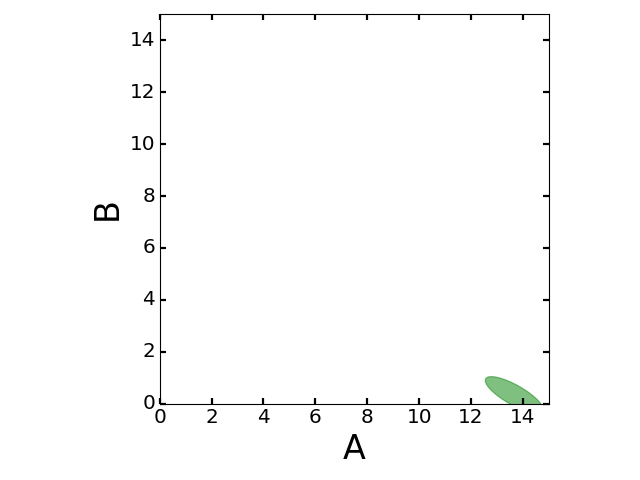

In [13]:
ma=model4.multiagent(initWidgets={'realtimePlot':False, 'netType':'erdos-renyi', 'netParam':[0.2,0.1,1,0.05],
                                    'systemSize':[15,3,50,1],
                        'initialState':{'U': [1,0,1,0.01],'B': [0,0,1,0.1],'A': [0,0,1,0.1]},
                        'runs':[3,1,20,1]})

## 3d vector plot test

In [ ]:
%%model
$
U -> A : g_1
U -> B : g_2
U -> C : g_3
A -> U : a_1
B -> U : a_2
C -> U : a_3
A + U -> A + A : r_1
B + U -> B + B : r_2
C + U -> C + C : r_3
A + B -> A + U : s
A + B -> B + U : s
A + C -> A + U : s
A + C -> C + U : s
B + C -> B + U : s
B + C -> C + U : s
$

In [ ]:
model7 = mmt.parseModel(In[36])

In [ ]:
model8 = model7.substitute('U = N - A - B - C')

In [ ]:
modelVectorCont2 = model8.vector('A', 'B', 'C')

In [ ]:
modelVectorCont2.showLogs()

## Non-constant system size tests with Brusselator

In [ ]:
%%model
$
(\alpha) -> X : \gamma
X + X + Y -> X + X + X : \chi
(\beta) + X -> Y + \emptyset : \delta
X -> \emptyset : \xi
$

In [ ]:
model9 = mmt.parseModel(In[41])

In [ ]:
model9.show()

In [ ]:
model9.showODEs()

In [ ]:
model9.showReactants()

In [ ]:
model9.visualise()

In [ ]:
modelStreamCont3 = model9.stream('X','Y', showFixedPoints = False, showNoise=True)

In [ ]:
modelStreamCont3.showLogs(tail = True)

In [ ]:
# these operations are necessary to avoid issue #78
model9 = model9.substitute('\\xi = a')
model9 = model9.substitute('a = \\xi')
model9.SSA(visualisationType= 'final', final_x = 'X', final_y='Y', maxTime= 10, runs= 10,
          plotProportions= True, aggregateResults= True,  realtimePlot= False,
           params = [ ('systemSize', 30 )] )

## Master Equation and noise approximation tests

In [ ]:
model9.showODEs_vKE()

In [ ]:
model9.showMasterEquation()

In [ ]:
model9.showFokkerPlanckEquation()

In [ ]:
model9.showNoiseEOM()

In [ ]:
model9.showNoiseStationarySol()

## View / controller separation tests

In [ ]:
#soloView1 = mmt.MuMoTbifurcationView(model4, None, 's', 'A', plottingMethod='pyds',
#                                     params = [('\mu', 1), ('v', 2), ('\Delta', 0)])

In [ ]:
soloView2 = mmt.MuMoTstreamView(model6, None, None, 'A', 'B', params = [('s', 1), ('v', 2)])

In [ ]:
model10 = model8.substitute('a_1 = a, a_2 = a, a_3 = a, g_1 = g, g_2 = g, g_3 = g, r_1 = r, r_2 = r, r_3 = r')

In [ ]:
soloView3 = mmt.MuMoTvectorView(model10, None, 'A', 'B', 'C', params = [('s', 5), ('a', 1/2), ('r', 5), ('g', 1)])

In [ ]:
soloView3.showLogs()

In [ ]:
mmt.MuMoTSSAView(model4, None, params = [('\\Delta', 2.0), ('s', 2.0), ('\\mu', 2.0), ('plotLimits', 1), ('systemSize', 35)], SSParams = {'aggregateResults': False, 'maxTime': 3.0, 'realtimePlot': False, 'runs': 15, 'plotProportions': False, 'initialState': {'A': 0.0, 'B': 0.0, 'U': 1.0}, 'randomSeed': 191853798, 'final_x': 'A', 'final_y': 'B', 'visualisationType': 'final'} )

In [ ]:
mmt.MuMoTmultiagentView(model4, None, params = [('\\Delta', 2.0), ('\\mu', 2.0), ('s', 2.0), ('plotLimits', 1), ('systemSize', 15)], SSParams = {'maxTime': 3.0, 'netType': 'erdos-renyi', 'realtimePlot': False, 'netParam': 0.2, 'aggregateResults': True, 'randomSeed': 1440908719, 'timestepSize': 0.136363636363636, 'plotProportions': False, 'initialState': {'A': 0.0, 'U': 1.0, 'B': 0.0}, 'runs': 3, 'visualisationType': 'evo'} )

## Multi controller tests

In [ ]:
multiController1 = mmt.MuMoTmultiController([model4.stream('A', 'B', silent = True, showFixedPoints=False), 
                                             model4.vector('A', 'B', silent = True)], shareAxes = True)

In [ ]:
multiController1.showLogs()

FloatSlider(value=0.5, continuous_update=False, description='\\(\\Delta\\)', max=10.0, readout_format='.1f')

FloatSlider(value=0.5, continuous_update=False, description='\\(\\mu\\)', max=10.0, readout_format='.1f')

FloatSlider(value=0.5, continuous_update=False, description='\\(s\\)', max=10.0, readout_format='.1f')

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

<IPython.core.display.Javascript object>


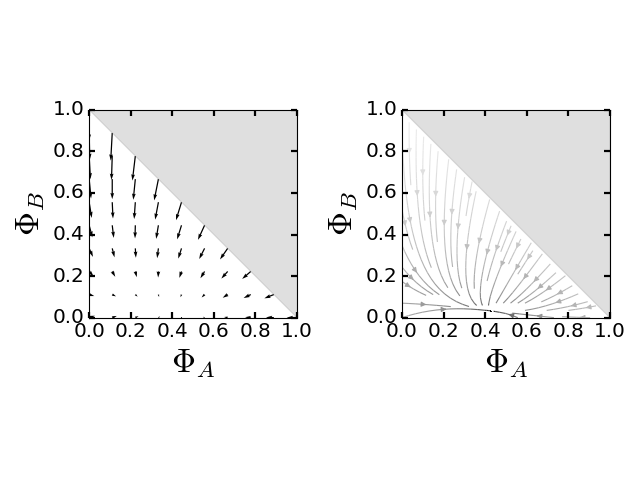

In [7]:
multiController2 = mmt.MuMoTmultiController([model4.vector('A', 'B', silent = True, showFixedPoints=False), model4.stream('A', 'B', silent = True)])

In [ ]:
multiController2.showLogs()

In [ ]:
multiController3 = mmt.MuMoTmultiController([model4.stream('A', 'B', silent = True), 
                                             model4.vector('A', 'B', silent = True)], shareAxes = True, silent = True)

In [ ]:
multiController4 = mmt.MuMoTmultiController([model4.bifurcation('s','A-B', params=[('\\Delta', 0.5), ('\\mu', 3)], 
                                                                initCondsSV = {'A': 0.3, 'B': 0.1}, 
                                               choose_xrange = [0,5], BifParInit = 4.5, silent = True), 
                                             model4.bifurcation('s','A-B', params=[('\\Delta', -0.5), ('\\mu', 3)],
                                                                initCondsSV = {'A': 0.3, 'B': 0.1}, 
                                               choose_xrange = [0,5], BifParInit = 4.5, silent = True)], 
                                            shareAxes = True)

FloatSlider(value=0.5, continuous_update=False, description='\\(\\Delta\\)', max=10.0, readout_format='.1f')

FloatSlider(value=0.5, continuous_update=False, description='\\(\\mu\\)', max=10.0, readout_format='.1f')

FloatSlider(value=0.5, continuous_update=False, description='\\(s\\)', max=10.0, readout_format='.1f')

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

Accordion(children=(Box(children=(FloatSlider(value=0.0, continuous_update=False, description='Reactant \\(A\\)', disabled=True, max=1.0, readout_format='.3f', step=0.001, style=SliderStyle(description_width='initial')), FloatSlider(value=0.0, continuous_update=False, description='Reactant \\(B\\)', max=0.0, readout_format='.1f', style=SliderStyle(description_width='initial')), FloatSlider(value=1.0, continuous_update=False, description='Reactant \\(U\\)', max=1.0, readout_format='.3f', step=0.001, style=SliderStyle(description_width='initial')), FloatSlider(value=3.0, continuous_update=False, description='Simulation time:', max=10.0, readout_format='.1f', style=SliderStyle(description_width='initial')), IntText(value=3302349825, description='Random seed:', style=DescriptionStyle(description_width='initial')), Checkbox(value=True, description='Plot population proportions', disabled=True), Checkbox(value=False, description='Runtime plot update'), IntSlider(value=50, continuous_update=False, description='Number of runs:', min=1, readout_format='.0f', style=SliderStyle(description_width='initial')), Checkbox(value=True, description='Aggregate results')), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

<IPython.core.display.Javascript object>


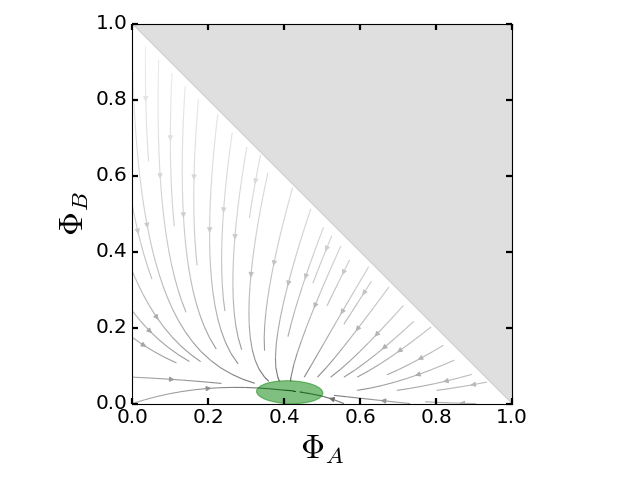

In [8]:
mtc = mmt.MuMoTmultiController([
        model4.SSA( silent = True),
        model4.stream("A","B", silent=True),
        #model4.multiagent(silent = True) 
],
                         #netParam=0.2,netType='erdos-renyi', 
                         initWidgets={'initialState':{'U': [1,0,1,0.001],'B': [0,0,1,0.1],'A': [0,0,1,0.1]},
                                      'runs':[50,1,100,1],'aggregateResults':True},
                        params=[('v_1', 4), ('systemSize',40)],
                        visualisationType='final', final_x='A', final_y='B',
                         shareAxes = True)

FloatSlider(value=0.0, continuous_update=False, description='\\(\\Phi^{0}_{A}\\)', max=1.0, readout_format='.1f')

FloatSlider(value=0.0, continuous_update=False, description='\\(\\Phi^{0}_{B}\\)', max=1.0, readout_format='.1f')

IntSlider(value=5, continuous_update=False, description='System size', min=5)

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

Accordion(children=(Box(children=(IntText(value=732520154, description='Random seed:', style=DescriptionStyle(description_width='initial')), ToggleButtons(description='Plot:', options=(('Temporal evolution', 'evo'), ('Final distribution', 'final')), tooltips=['Population change over time', 'Population distribution in each state at final timestep'], value='evo'), Dropdown(description='Final distribution (x axis):', layout=Layout(display='none'), options=(('A', 'A'), ('B', 'B'), ('U', 'U')), style=DescriptionStyle(description_width='initial'), value='A'), Dropdown(description='Final distribution (y axis):', index=1, layout=Layout(display='none'), options=(('A', 'A'), ('B', 'B'), ('U', 'U')), style=DescriptionStyle(description_width='initial'), value='B'), Checkbox(value=False, description='Runtime plot update'), IntSlider(value=1, continuous_update=False, description='Number of runs:', max=50, min=1, readout_format='.0f', style=SliderStyle(description_width='initial')), Checkbox(value=True, description='Aggregate results')), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

<IPython.core.display.Javascript object>


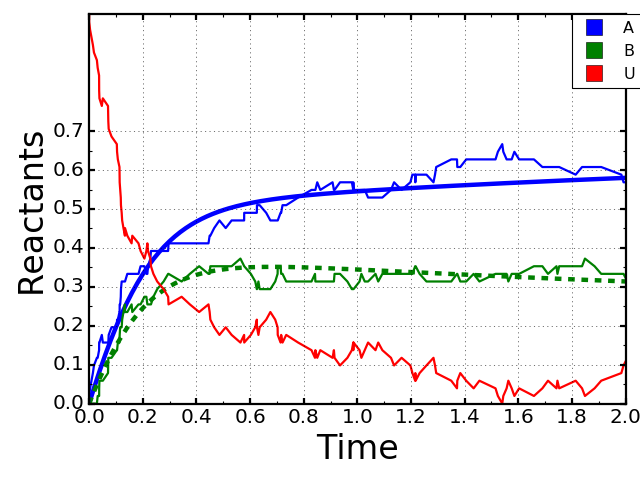

In [13]:
mc = mmt.MuMoTmultiController([
                            model4.numSimStateVar(tend=2, initCondsSV = {'B': 0.0, 'A':0.0}, 
                                                  params = [('\\Delta', 0.5), ('\\mu', 2.0), ('s', 0.5)],
                                                  silent=True),
                            model4.SSA(
                                params = [('\\Delta', 0.5), ('\\mu', 2.0), ('s', 0.5)],
                                maxTime=2, plotProportions=True,
                                initialState = {'B': 0.0, 'U': 1.0, 'A': 0.0},
                                initWidgets={'runs':[1,1,50,1]},
                                silent = True),],
                            shareAxes = True)

IntSlider(value=5, continuous_update=False, description='System size', min=5)

Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log')

HTML(value='')

Accordion(children=(Box(children=(FloatSlider(value=1.0, continuous_update=False, description='Timestep size', layout=Layout(width='50%'), max=1.0, min=0.01, step=0.01, style=SliderStyle(description_width='initial')), Dropdown(description='Network topology:', options=(('Full graph', <NetworkType.FULLY_CONNECTED: 0>), ('Erdos-Renyi', <NetworkType.ERSOS_RENYI: 1>), ('Barabasi-Albert', <NetworkType.BARABASI_ALBERT: 2>), ('Moving particles', <NetworkType.DYNAMIC: 4>)), style=DescriptionStyle(description_width='initial'), value=<NetworkType.FULLY_CONNECTED: 0>), FloatSlider(value=0.0, continuous_update=False, description='Network connectivity parameter', layout=Layout(display='none', width='50%'), max=0.0, readout_format='.1f', step=0.0, style=SliderStyle(description_width='initial')), FloatSlider(value=0.01, continuous_update=False, description='Particle speed', layout=Layout(display='none', width='50%'), max=0.1, readout_format='.3f', step=0.005, style=SliderStyle(description_width='initial')), FloatSlider(value=0.5, continuous_update=False, description='Correlatedness of the random walk', layout=Layout(display='none', width='50%'), max=1.0, step=0.05, style=SliderStyle(description_width='initial')), IntText(value=2379848439, description='Random seed:', style=DescriptionStyle(description_width='initial')), Dropdown(description='Final distribution (x axis):', options=(('A', 'A'), ('B', 'B'), ('U', 'U')), style=DescriptionStyle(description_width='initial'), value='A'), Dropdown(description='Final distribution (y axis):', index=1, options=(('A', 'A'), ('B', 'B'), ('U', 'U')), style=DescriptionStyle(description_width='initial'), value='B'), Checkbox(value=False, description='Show particle trace', layout=Layout(display='none')), Checkbox(value=False, description='Show communication links', layout=Layout(display='none')), Checkbox(value=False, description='Runtime plot update'), IntSlider(value=1, continuous_update=False, description='Number of runs:', max=50, min=1, readout_format='.0f', style=SliderStyle(description_width='initial')), Checkbox(value=True, description='Aggregate results')), layout=Layout(flex_flow='column')),), selected_index=None, _titles={'0': 'Advanced options'})

<IPython.core.display.Javascript object>


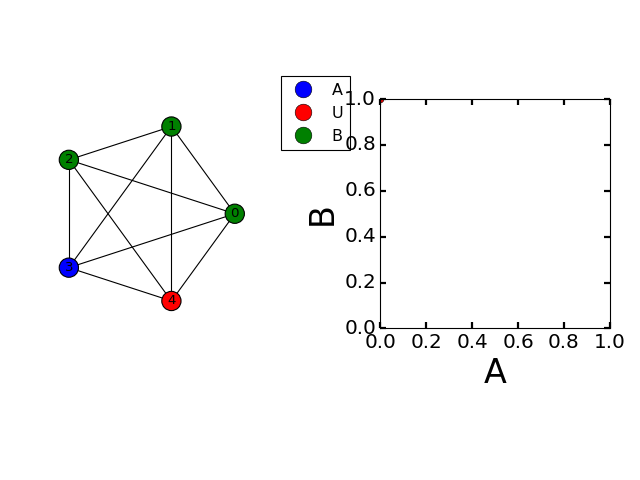

In [10]:
mc2 = mmt.MuMoTmultiController([
                            model4.multiagent(silent=True, visualisationType='graph'),
                            model4.SSA(silent = True, visualisationType='final')],
                                params = [('\\Delta', 0.5), ('\\mu', 2.0), ('s', 0.5)],
                                maxTime=4, plotProportions=True,
                                initialState = {'B': 0.0, 'U': 1.0, 'A': 0.0},
                                initWidgets={'runs':[1,1,50,1]},
                            shareAxes = False)

### Nested multicontrollers

In [ ]:
#multiController4 = mmt.MuMoTmultiController([model10.vector('A', 'B', 'C', silent = True, showFixedPoints=True), 
#                                             multiController3])

In [ ]:
#multiController4.showLogs()

## Bookmark / partial controller tests

In [ ]:
partial1 = model9.stream('X','Y', params = [('\\alpha', 1), ('plotLimits', 2)], showFixedPoints = False)

In [ ]:
modelBifCont1._view._build_bookmark().replace('\\\\','\\')

In [ ]:
bookmark1 = model4.bifurcation('s', 'A', 'B', params = [('\\mu', 0.5), ('\\Delta', 0.5), ('plotLimits', 1), ('systemSize', 1)], initSV = [['A', 0.5], ['B', 0.5]], bookmark = False)

In [ ]:
modelStreamCont3._view._build_bookmark().replace('\\\\','\\')

In [ ]:
bookmark2 = model9.stream('X', 'Y', params = [('\\alpha', 0.5), ('\\xi', 0.5), ('\\delta', 0.5), ('\\chi', 0.5), ('\\beta', 0.5), ('\\gamma', 0.5), ('plotLimits', 1.0), ('systemSize', 1)], showFixedPoints = False, bookmark = False)

In [ ]:
modelVectorCont1._view._build_bookmark().replace('\\\\','\\')

In [ ]:
bookmark3 = model4.vector('A', 'B', params = [('\\mu', 0.5), ('s', 0.5), ('\\Delta', 0.5), ('plotLimits', 1), ('systemSize', 1)], showFixedPoints = True, bookmark = False)

In [ ]:
modelVectorCont2._view._build_bookmark().replace('\\\\','\\')

In [ ]:
bookmark4 = model8.vector('A', 'B', 'C', params = [('r_{3}', 0.5), ('a_{1}', 0.5), ('r_{1}', 0.5), ('r_{2}', 0.5), ('a_{3}', 0.5), ('g_{2}', 0.5), ('g_{3}', 0.5), ('s', 0.5), ('a_{2}', 0.5), ('g_{1}', 0.5), ('plotLimits', 1), ('systemSize', 1)], bookmark = False)

In [ ]:
bookmark5 = mmt.MuMoTmultiController([model4.stream('A', 'B', silent = True, showFixedPoints = False, bookmark = False), model4.vector('A', 'B', silent = True, bookmark = False)], params = [('\\mu', 0.5), ('s', 0.5), ('\\Delta', 0.5), ('plotLimits', 1), ('systemSize', 1)], shareAxes = True, bookmark = False)

In [ ]:
bookmark6 = mmt.MuMoTmultiController([model4.vector('A', 'B', silent = True, showFixedPoints = False, bookmark = False), model4.stream('A', 'B', silent = True, bookmark = False)], params = [('\\mu', 0.5), ('s', 0.5), ('\\Delta', 0.5), ('plotLimits', 1), ('systemSize', 1)], bookmark = False)

In [ ]:
bookmark7 = model4.SSA(params = [('\\Delta', 2.0), ('s', 2.0), ('\\mu', 2.0), ('plotLimits', 1), ('systemSize', 10)], initialState = {'B': 0.0, 'U': 1.0, 'A': 0.0}, maxTime = 3.0, randomSeed = 191853798, visualisationType = 'barplot', plotProportions = True, realtimePlot = False, runs = 5, aggregateResults = True, silent = False, bookmark = False)

In [ ]:
bookmark8 = model4.multiagent(params = [('\\Delta', 2.0), ('s', 2.0), ('\\mu', 2.0), ('plotLimits', 1), ('systemSize', 25)], initialState = {'B': 0.0, 'U': 1.0, 'A': 0.0}, maxTime = 3.0, timestepSize = 0.13636363636363635, randomSeed = 4150422879, netType = 'barabasi-albert', netParam = 3.0, visualisationType = 'graph', plotProportions = False, realtimePlot = False, runs = 1, aggregateResults = True, silent = False, bookmark = False)

In [ ]:
#bookmark7 = nested multicontroller bookmark